Introduction
============

This is interactive notebook regarding "Introduction to path planning". (Author: Björn Hein)

License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

This notebook imports all discussed algorithms and does a comparison

**Attention**: This worksheet has external dependencies 

* to the files "InnoKonz2dEnv.py" or "InnoKonzShapelyEnv.py". These files contain simple 2D environments based on numpy arrays or the shapely library with an interface for the use as collision checking in the algorithms.
* to all modules like "**Algorithm**.py", which contains the corresponding algorithms 

Important links are:

* General Info: http://www.python.org
* Python tutorial http://www.python.org/doc/tut/
* NetworkX http://networkx.github.io/
* NumPy and SciPy Guide http://docs.scipy.org/
* Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html


Remember that:

* you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
* you can execute the whole notebook by Cell->runAll

Änderungen BasicPRM

- Automated Planner Test:
  - IPBasicPRM_Roundtrip eingefügt
  - Eigene Methode für Planer erstellt
  - PlanRoundPath bei Visualisierung eingefügt
- IPBasicPRM_Roundtrip
  - erstellt aus IPBasicPRM
  - "Break" in "Continue" geändert bei "_learnRoadmapNearestNeighbour"
  - Funktion "PlanRoundPath" aus "PlanPath" erstellt
  - "InterimGoal" entsprechend "Start" und "Goal" eingefügt
  - InterimGoal in Lösungspfad eingebaut
- IPBenchmark
  - "InterimGoalList" eingefügt
- IPPlanerBase
  - "InterimGoalList" eingefügt
- IPTestSuite
  - Koordinate von InterimGoal hinzugefügt
- IPVISBasicPRM
  - Darstellung von Interim hinzugefügt

Adding all planners
===========


In [1]:
import sys
import HelperClass
sys.path.append("templates")
%load_ext autoreload
%autoreload 2

In [2]:
from IPPerfMonitor import IPPerfMonitor

import IPVISBasicPRM
import IPBasicPRM_Roundtrip

import IPVisibilityPRM_Roundtrip
import IPVISVisibilityPRM

import IPLazyPRM_Roundtrip
import IPVISLazyPRM


Set-up of the test scenario and the configuration for all planner
===================================

Following a procedure to compare all discussed planners are shown:

1. Configuration for every planner is defined
2. The configuration and the planner is stored in the variable setup, a Python dict()
3. the variable setup is then used to uniformly call the planning calls


In [3]:
plannerFactory = dict()

# basicConfig = dict()
# basicConfig["radius"] = 3
# basicConfig["numNodes"] = 200
# plannerFactory["basePRM"] = [IPBasicPRM_Roundtrip.BasicPRM, basicConfig, IPVISBasicPRM.basicPRMVisualize]

# visbilityConfig = dict()
# visbilityConfig["ntry"] = 300
# plannerFactory["visibilityPRM"] = [IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]

lazyConfig = dict()
lazyConfig["initialRoadmapSize"] = 50
lazyConfig["updateRoadmapSize"]  = 2
lazyConfig["kNearest"] = 10
plannerFactory["lazyPRM"] = [IPLazyPRM_Roundtrip.LazyPRM, lazyConfig, IPVISLazyPRM.lazyPRMVisualize]

In [4]:
class ResultCollection (object):
    
    def __init__(self, plannerFactoryName, planner, benchmark, solution, perfDataFrame):
        self.plannerFactoryName = plannerFactoryName
        self.planner = planner
        self.benchmark = benchmark
        self.solution = solution
        self.perfDataFrame = perfDataFrame

In [5]:
import IPTestSuite
import importlib

In [6]:
importlib.reload(IPTestSuite)

<module 'IPTestSuite' from 'c:\\Users\\andre\\OneDrive - Hochschule Karlsruhe\\HS Karlsruhe\\1. Semester\\Roboterprogrammierung\\Projekt\\Git\\RKIM23RobotProgramDS\\02_eigeneNotebooks\\IPTestSuite.py'>

In [7]:
fullBenchList = IPTestSuite.benchList

for benchmark in fullBenchList:
    print(benchmark.name)

Trap
Bottleneck
Fat bottleneck
B_rush
circle od death


In [8]:
resultList = list()
testList = fullBenchList[:1]

for key,producer in list(plannerFactory.items()):
    HelperClass.HelperClass.printInColor(str(key)+" "+ str(producer), 'yellow')
    #print(key, producer)
    for benchmark in testList:
        HelperClass.HelperClass.printInColor("Planning: " + key + " - " + benchmark.name, 'yellow')
        #planner = IPBasicPRM.BasicPRM(benchmark.collisionChecker)
        planner = producer[0](benchmark.collisionChecker)
        IPPerfMonitor.clearData()
        

        try:
            resultList.append(ResultCollection(key,
                                        planner, 
                                        benchmark, 
                                        planner.planRoundPath(benchmark.startList,benchmark.interimGoalList,benchmark.goalList,producer[1]),
                                        IPPerfMonitor.dataFrame()),)
            #a = planner.planPath(benchmark.startList,benchmark.goalList,producer[1])
            # print("")


        except Exception as e:
            HelperClass.HelperClass.printInColor("PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR", 'red')
            HelperClass.HelperClass.printInColor(e, 'red')
            pass

        

Erstes Ziel Interim:[[3, 10], 7.810249675906654, 'interim0']
try-Pfad nach Löschung von Start:  [9, 'interim0']
While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [9, 15]
step [2.516775137018338, 16.651558195046075]
******* Check Edges for Collision
Step 9
Path start
Collison zwischen 9   start

Kollision erkannt
MaxTry: 1
Trypath vor pop  ['start', 14, 'interim0']
TRYPATH-Umplanung nach Kollision: [14, 'interim0']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [9, 15]
step [8.047342833523176, 10.027005945183431]
******* Check Edges for Collision
Step 14
Path start
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 5.047415081028409, 'interim0']


Ziel-Interim: [[3, 10], 5.047415081028409, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [8.047342833523176, 10.027005945183431]
step [3, 10]
******* Check Edges for Collision
Step interim0
Path 14
Collison zwischen interim0   14

Kollision erkannt
MaxTry: 2
Trypath vor pop  [14, 42, 'interim0']
TRYPATH-Umplanung nach Kollision: [42, 'interim0']

While beginnt


Aktueller Node (step):  42
Path im Check and CollisonUpdate [8.047342833523176, 10.027005945183431]
step [3.3969696929454347, 9.589560073585707]
******* Check Edges for Collision
Step 42
Path 14
Collison zwischen 42   14

Kollision erkannt
MaxTry: 3
Trypath vor pop  [14, 47, 'interim0']
TRYPATH-Umplanung nach Kollision: [47, 'interim0']

While beginnt


Aktueller Node (step):  47
Path im Check and CollisonUpdate [8.047342833523176, 10.027005945183431]
step [6.7866058888223355, 10.67442797449574]
Removed nodeNumber mit Koordinaten: [6.7866058888223355, 10.67442797449574]
Remove Nodenumer:  47

Kollision erkannt
MaxTry: 4
Trypath vor pop  [14, 48, 'interim0']
TRYPATH-Umplanung nach Kollision: [48, 'interim0']

While beginnt


Aktueller Node (step):  48
Path im Check and CollisonUpdate [8.047342833523176, 10.027005945183431]
step [2.6024555213773386, 10.397263112223754]
******* Check Edges for Collision
Step 48
Path 14
Collison zwischen 48   14

Kollision erkannt
MaxTry: 5
Trypath vor pop  [14, 13, 23, 3, 'interim0']
TRYPATH-Umplanung nach Kollision: [13, 23, 3, 'interim0']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [8.047342833523176, 10.027005945183431]
step [9.332832195296582, 13.770624100142978]
******* Check Edges for Collision
Step 13
Path 14
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 7.370371070601803, 'interim0']


Ziel-Interim: [[3, 10], 7.370371070601803, 'interim0']


Aktueller Node (step):  23
Path im Check and CollisonUpdate [9.332832195296582, 13.770624100142978]
step [3.734798156280851, 17.25147516094827]
******* Check Edges for Collision
Step 23
Path 13
Collison zwischen 23   13

Kollision erkannt
MaxTry: 6
Trypath vor pop  [13, 8, 9, 'interim0']
TRYPATH-Umplanung nach Kollision: [8, 9, 'interim0']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [9.332832195296582, 13.770624100142978]
step [5.034659674566502, 19.496521197322924]
******* Check Edges for Collision
Step 8
Path 13
Collison zwischen 8   13

Kollision erkannt
MaxTry: 7
Trypath vor pop  [13, 57, 9, 'interim0']
TRYPATH-Umplanung nach Kollision: [57, 9, 'interim0']

While beginnt


Aktueller Node (step):  57
Path im Check and CollisonUpdate [9.332832195296582, 13.770624100142978]
step [4.065140345230066, 17.516710546376373]
******* Check Edges for Collision
Step 57
Path 13
Collison zwischen 57   13

Kollision erkannt
MaxTry: 8
Trypath vor pop  [13, 63, 42, 'interim0']
TRYPATH-Umplanung nach Kollision: [63, 42, 'interim0']

While beginnt


Aktueller Node (step):  63
Path im Check and CollisonUpdate [9.332832195296582, 13.770624100142978]
step [8.278523703505408, 8.513175276916913]
Removed nodeNumber mit Koordinaten: [8.278523703505408, 8.513175276916913]
Remove Nodenumer:  63

Kollision erkannt
MaxTry: 9
Trypath vor pop  [13, 'start', 23, 3, 'interim0']
TRYPATH-Umplanung nach Kollision: ['start', 23, 3, 'interim0']

While beginnt


Aktueller Node (step):  start
Path im Check and CollisonUpdate [9.332832195296582, 13.770624100142978]
step [9, 15]
******* Check Edges for Collision
Step start
Path 13
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 7.810249675906654, 'interim0']


Ziel-Interim: [[3, 10], 7.810249675906654, 'interim0']


Aktueller Node (step):  23
Path im Check and CollisonUpdate [9, 15]
step [3.734798156280851, 17.25147516094827]
******* Check Edges for Collision
Step 23
Path start
Collison zwischen 23   start

Kollision erkannt
MaxTry: 10
Trypath vor pop  ['start', 8, 9, 'interim0']
TRYPATH-Umplanung nach Kollision: [8, 9, 'interim0']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [9, 15]
step [5.034659674566502, 19.496521197322924]
******* Check Edges for Collision
Step 8
Path start
Collison zwischen 8   start

Kollision erkannt
MaxTry: 11
Trypath vor pop  ['start', 14, 69, 'interim0']
TRYPATH-Umplanung nach Kollision: [14, 69, 'interim0']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [9, 15]
step [8.047342833523176, 10.027005945183431]
******* Check Edges for Collision
Step 14
Path start
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 5.047415081028409, 'interim0']


Ziel-Interim: [[3, 10], 5.047415081028409, 'interim0']


Aktueller Node (step):  69
Path im Check and CollisonUpdate [8.047342833523176, 10.027005945183431]
step [4.200086775948964, 11.465102159466237]
******* Check Edges for Collision
Step 69
Path 14
Collison zwischen 69   14

Kollision erkannt
MaxTry: 12
Trypath vor pop  [14, 'start', 55, 3, 'interim0']
TRYPATH-Umplanung nach Kollision: ['start', 55, 3, 'interim0']

While beginnt


Aktueller Node (step):  start
Path im Check and CollisonUpdate [8.047342833523176, 10.027005945183431]
step [9, 15]
******* Check Edges for Collision
Step start
Path 14
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 7.810249675906654, 'interim0']


Ziel-Interim: [[3, 10], 7.810249675906654, 'interim0']


Aktueller Node (step):  55
Path im Check and CollisonUpdate [9, 15]
step [2.874146869454533, 16.489882106328313]
******* Check Edges for Collision
Step 55
Path start
Collison zwischen 55   start

Kollision erkannt
MaxTry: 13
Trypath vor pop  ['start', 57, 9, 'interim0']
TRYPATH-Umplanung nach Kollision: [57, 9, 'interim0']

While beginnt


Aktueller Node (step):  57
Path im Check and CollisonUpdate [9, 15]
step [4.065140345230066, 17.516710546376373]
******* Check Edges for Collision
Step 57
Path start
Collison zwischen 57   start

Kollision erkannt
MaxTry: 14
Trypath vor pop  ['start', 31, 8, 3, 'interim0']
TRYPATH-Umplanung nach Kollision: [31, 8, 3, 'interim0']

While beginnt


Aktueller Node (step):  31
Path im Check and CollisonUpdate [9, 15]
step [10.985382980909298, 20.991358223063685]
******* Check Edges for Collision
Step 31
Path start
Keine Kollission erkannt
Neues Interrim:  [[20, 15], 10.82403313732698, 'interim3']


Ziel-Interim: [[20, 15], 10.82403313732698, 'interim3']


Aktueller Node (step):  8
Path im Check and CollisonUpdate [10.985382980909298, 20.991358223063685]
step [5.034659674566502, 19.496521197322924]
******* Check Edges for Collision
Step 8
Path 31
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 9.712041744273481, 'interim0']


Ziel-Interim: [[3, 10], 9.712041744273481, 'interim0']


Aktueller Node (step):  3
Path im Check and CollisonUpdate [5.034659674566502, 19.496521197322924]
step [3.7582955264930424, 14.60074267035695]
******* Check Edges for Collision
Step 3
Path 8
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 4.662815160859646, 'interim0']


Ziel-Interim: [[3, 10], 4.662815160859646, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [3.7582955264930424, 14.60074267035695]
step [3, 10]
******* Check Edges for Collision
Step interim0
Path 3
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 0.0, 'interim0']


Ziel-Interim: [[3, 10], 0.0, 'interim0']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[3, 3], 7.0, 'interim2']
Neuer TRYPATH nachdem Ziel erreicht['interim0', 7, 'interim2']
interim0  aus Trypath entfernt
While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [3, 10]
step [3.4543657310312565, 4.34148973562044]
******* Check Edges for Collision
Step 7
Path interim0
Keine Kollission erkannt
Neues Interrim:  [[3, 3], 1.4163484487620153, 'interim2']


Ziel-Interim: [[3, 3], 1.4163484487620153, 'interim2']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [3.4543657310312565, 4.34148973562044]
step [3, 3]
******* Check Edges for Collision
Step interim2
Path 7
Keine Kollission erkannt
Neues Interrim:  [[3, 3], 0.0, 'interim2']


Ziel-Interim: [[3, 3], 0.0, 'interim2']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[10, 1], 7.280109889280518, 'interim4']
Neuer TRYPATH nachdem Ziel erreicht['interim2', 16, 'interim4']
interim2  aus Trypath entfernt
While beginnt


Aktueller Node (step):  16
Path im Check and CollisonUpdate [3, 3]
step [4.74744495749972, 1.71725071889348]
******* Check Edges for Collision
Step 16
Path interim2
Keine Kollission erkannt
Neues Interrim:  [[10, 1], 5.301300129991541, 'interim4']


Ziel-Interim: [[10, 1], 5.301300129991541, 'interim4']


Aktueller Node (step):  interim4
Path im Check and CollisonUpdate [4.74744495749972, 1.71725071889348]
step [10, 1]
******* Check Edges for Collision
Step interim4
Path 16
Keine Kollission erkannt
Neues Interrim:  [[10, 1], 0.0, 'interim4']


Ziel-Interim: [[10, 1], 0.0, 'interim4']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[22, 8], 13.892443989449804, 'interim1']
Neuer TRYPATH nachdem Ziel erreicht['interim4', 20, 5, 0, 'interim1']
interim4  aus Trypath entfernt
While beginnt


Aktueller Node (step):  20
Path im Check and CollisonUpdate [10, 1]
step [12.515870265606072, 3.279693459024882]
******* Check Edges for Collision
Step 20
Path interim4
Keine Kollission erkannt
Neues Interrim:  [[22, 8], 10.593866652907593, 'interim1']


Ziel-Interim: [[22, 8], 10.593866652907593, 'interim1']


Aktueller Node (step):  5
Path im Check and CollisonUpdate [12.515870265606072, 3.279693459024882]
step [18.52762547174871, 2.1487436897389744]
******* Check Edges for Collision
Step 5
Path 20
Keine Kollission erkannt
Neues Interrim:  [[22, 8], 6.804012439202168, 'interim1']


Ziel-Interim: [[22, 8], 6.804012439202168, 'interim1']


Aktueller Node (step):  0
Path im Check and CollisonUpdate [18.52762547174871, 2.1487436897389744]
step [20.37260328391703, 3.871993673326081]
******* Check Edges for Collision
Step 0
Path 5
Keine Kollission erkannt
Neues Interrim:  [[22, 8], 4.437212672903739, 'interim1']


Ziel-Interim: [[22, 8], 4.437212672903739, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [20.37260328391703, 3.871993673326081]
step [22, 8]
******* Check Edges for Collision
Step interim1
Path 0
Keine Kollission erkannt
Neues Interrim:  [[22, 8], 0.0, 'interim1']


Ziel-Interim: [[22, 8], 0.0, 'interim1']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[20, 15], 7.280109889280518, 'interim3']
Neuer TRYPATH nachdem Ziel erreicht['interim1', 50, 'interim3']
interim1  aus Trypath entfernt
While beginnt


Aktueller Node (step):  50
Path im Check and CollisonUpdate [22, 8]
step [19.867669059391847, 11.263435303974678]
******* Check Edges for Collision
Step 50
Path interim1
Keine Kollission erkannt
Neues Interrim:  [[20, 15], 3.7389072207564937, 'interim3']


Ziel-Interim: [[20, 15], 3.7389072207564937, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [19.867669059391847, 11.263435303974678]
step [20, 15]
******* Check Edges for Collision
Step interim3
Path 50
Keine Kollission erkannt
Neues Interrim:  [[20, 15], 0.0, 'interim3']


Ziel-Interim: [[20, 15], 0.0, 'interim3']
Interim ist erreicht!


No other connected components
Solution: ['start', 14, 13, 'start', 14, 'start', 31, 8, 3, 'interim0', 7, 'interim2', 16, 'interim4', 20, 5, 0, 'interim1', 50, 'interim3']
start 14
14 13
13 start
start 14
14 start
start 31
31 8
8 3
3 interim0
interim0 7
7 interim2
interim2 16
16 interim4
interim4 20
20 5
5 0
0 interim1
interim1 50
50 interim3
Kanten: [('start', 14), ('start', 13), ('start', 31), (14, 13), (31, 8), (8, 3), (3, 'interim0'), ('interim0', 7), (7, 'interim2'), ('interim2', 16), (16, 'interim4'), ('interim4', 20), (20, 5), (5, 0), (0, 'interim1'), ('interim1', 50), (50, 'interim3')]
Solution: ['start', 14, 13, 'start', 14, 'start', 31, 8, 3, 'interim0', 7, 'interim2', 16, 'interim4', 20, 5, 0, 'interim1', 50, 'interim3']

Planner: <IPLazyPRM_Roundtrip.LazyPRM object at 0x000001E1C9FA7990>
Solution['start', 14, 13, 'start', 14, 'start', 31, 8, 3, 'interim0', 7, 'interim2', 16, 'interim4', 20, 5, 0, 'interim1', 50, 'interim3']


c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


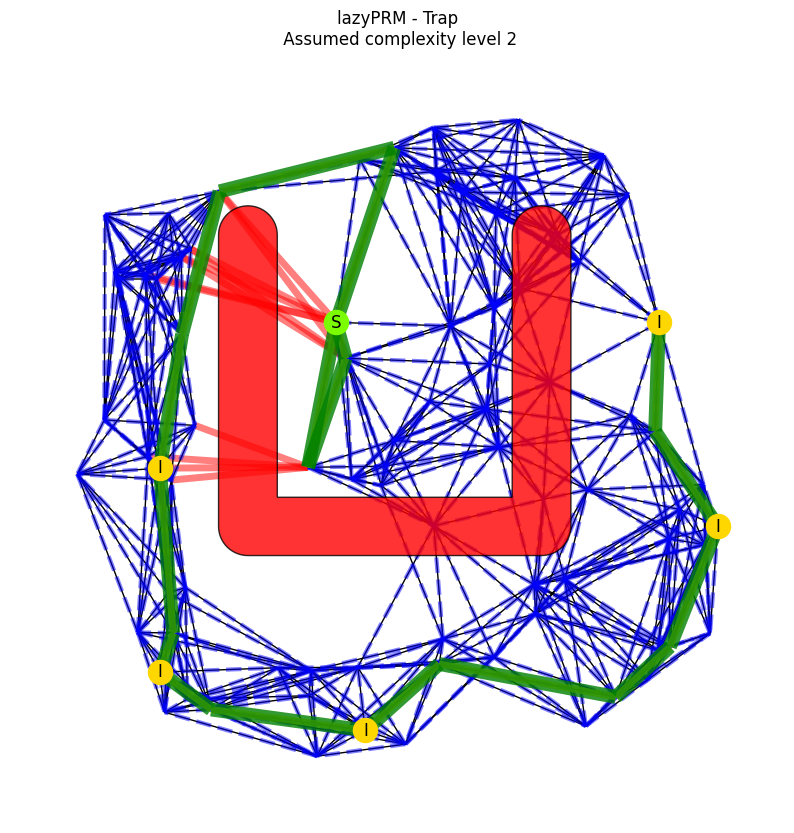

In [9]:
import matplotlib.pyplot as plt

for result in resultList:
    print(result)
    fig_local = plt.figure(figsize=(10,10))
    ax = fig_local.add_subplot(1,1,1)
    title = result.plannerFactoryName + " - " + result.benchmark.name
    if result.solution == []:
        title += " (No path found!)"
    title += "\n Assumed complexity level " + str(result.benchmark.level)
    ax.set_title(title)

    ax.grid(True)

    try:
        #IPVISBasicsPRM.basicPRMVisualize(result.planner, result.solution, ax=ax, nodeSize=100))
        plannerFactory[result.plannerFactoryName][2](result.planner, result.solution, ax=ax, nodeSize=100)
        print("")
        print("Planner: "+ str(result.planner))
        print("Solution" + str(result.solution))

    except Exception as e:
        print ("Error")
        print(e)
        pass
    

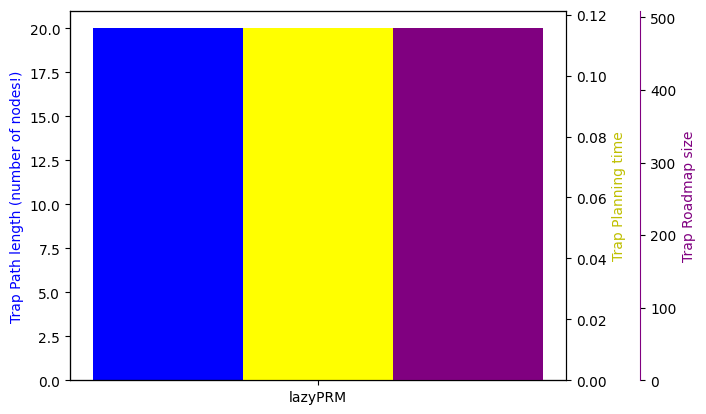

In [10]:
import numpy as np
for bench in testList:
    title = bench.name
    pathLength = dict()
    planningTime = dict()
    roadmapSize  = dict()
    
    try:
        for result in resultList:
            if result.benchmark.name == bench.name:
                #print result.benchmark.name  + " - " +  result.plannerFactoryName, len(result.solution)
                pathLength[result.plannerFactoryName] = len(result.solution)
                planningTime[result.plannerFactoryName] = result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)["time"]["planRoundPath"]
                roadmapSize[result.plannerFactoryName] = result.planner.graph.size()


        fig, ax = plt.subplots()

        width = 0.2

        ax.bar(np.arange(len(pathLength.keys())), pathLength.values(),width, color="blue")
        ax.set_ylabel(title + " Path length (number of nodes!)", color="blue")
        ax.set_xticks(np.arange(len(pathLength.keys())) + width)
        ax.set_xticklabels(pathLength.keys())

        ax2 = ax.twinx()
        bar = ax2.bar(np.arange(len(pathLength.keys()))+width, planningTime.values(),width, color="red")
        ax2.set_ylabel(title + " Planning time", color="y")

        # Add coloring and patterns on axis two
        hatches = ['x' if length==0 else '' for length in pathLength.values()]
        color   = ['red' if length==0 else 'yellow' for length in pathLength.values()]
        for i,thisbar in enumerate(bar.patches):
            thisbar.set_facecolor(color[i])
            thisbar.set_hatch(hatches[i])

        # Multiple axes 
        ax3 = ax.twinx()
        ax3.bar(np.arange(len(pathLength.keys()))+2*width, roadmapSize.values(),width, color="purple")
        ax3.set_ylabel(title + " Roadmap size",  color="purple")
        ax3.spines['right'].set_position(('axes', 1.15))
        ax3.spines['right'].set_color("purple")
    except:
        pass


    
        
    

result.perfDataFrame.groupby(["name"]).sum()

In [11]:
result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)

,time
name,
_buildRoadmap,0.012005
_checkForCollisionAndUpdate,0.028498
_nearestInterim,0.004002
lineInCollision,0.026499
planRoundPath,0.115522
pointInCollision,0.015991


In [12]:
result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"]

,name,args,kwargs,retVal,time
72,planRoundPath,(<IPLazyPRM_Roundtrip.LazyPRM object at 0x0000...,{},"[start, 14, 13, start, 14, start, 31, 8, 3, in...",0.115522


In [13]:
result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_21460\2940436852.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)


0.0